In [23]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import ast


In [24]:
# Load csv file
comments_data = pd.read_csv('data/preprocessed.csv')

# Dataframe
df_comments = pd.DataFrame(comments_data) 

In [ ]:
# # Fixed words having apostrophe

# # Load csv file
# df_comments = pd.read_csv('data/preprocessed.csv')
# # Parse preprocess column
# df_comments["preprocessed"] = [ast.literal_eval(x) for x in df_comments["preprocessed"]]

In [25]:
# Dataframes for different platforms
df_fb = df_comments[df_comments['platform'] == 'Facebook']
df_yt = df_comments[df_comments['platform'] == 'Youtube']
df_red = df_comments[df_comments['platform'] == 'Reddit']
df_tik = df_comments[df_comments['platform'] == 'Tiktok']

## Understanding the dataset

In [26]:
# check data samples 
df_comments.head(3)

,platform,raw,preprocessed
0,Facebook,Why nowadays every thing seem to be increasin...,"[nowadays, every, thing, seem, increasing, gov..."
1,Facebook,I will have to disagree.. we’re not that high!!,"[disagree, high]"
2,Facebook,"Wag po tayong mag-alala. Naniniwala po ako, is...","[wag, po, tayong, magalala, naniniwala, po, is..."


In [38]:
# check duplicates
print("Duplicates: ", df_comments.duplicated().sum())

TypeError: unhashable type: 'list'

In [28]:
# check missing values
df_comments.isnull().sum()

platform        0
raw             0
preprocessed    0
dtype: int64

In [29]:
# check the data type of each column
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   platform      5209 non-null   object
 1   raw           5209 non-null   object
 2   preprocessed  5209 non-null   object
dtypes: object(3)
memory usage: 122.2+ KB


In [30]:
# check unique platforms
df_comments['platform'].unique()

array(['Facebook', 'Reddit', 'Tiktok', 'Youtube'], dtype=object)

## Visualization

In [31]:
# Generate bar graph
from collections import Counter
import seaborn as sns

def draw_bar_graph_for_text_visualization(df, platform):
    comm_word_list = get_words_from_col(df)
    
    comment_count = Counter(comm_word_list)
    top_words = pd.DataFrame(comment_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.barplot(x='word', y='Counter', 
                data=top_words, ax=ax)
    plt.title("Top 50 Most Prevalant Words in {}".format(platform))
    plt.xticks(rotation='vertical');

def get_words_from_col(df):
    fb_comm_lol = df['preprocessed']

    comm_word_list = []
    fb_comm_lol= fb_comm_lol.apply(eval)
    for sublist in fb_comm_lol:
        for word in sublist:
            comm_word_list.append(word)
    
    return comm_word_list

In [32]:
from wordcloud import WordCloud, STOPWORDS
def draw_word_cloud(df, title):
    fb_comm_lol = df['preprocessed']
    word_cloud = WordCloud(
                    background_color='white',
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(fb_comm_lol))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

In [33]:
# Top 50 most prevalent words in Facebook
draw_bar_graph_for_text_visualization(df_fb, 'Facebook')

TypeError: eval() arg 1 must be a string, bytes or code object

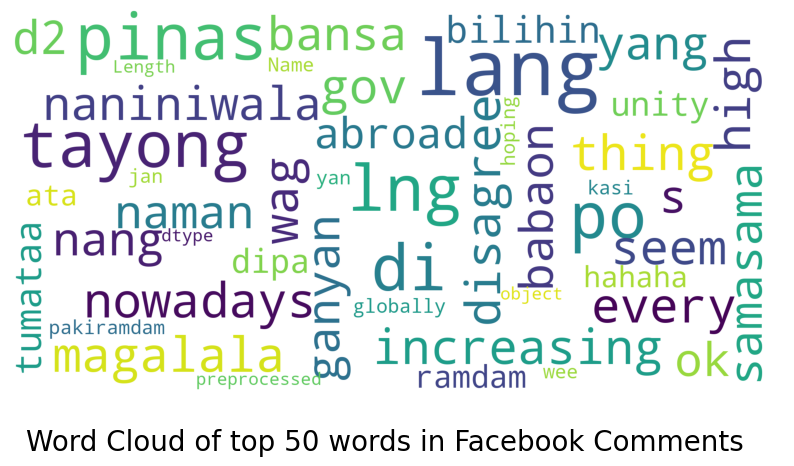

In [34]:
# WordCloud for Facebook comments
draw_word_cloud(df_fb, 'Word Cloud of top 50 words in Facebook Comments')

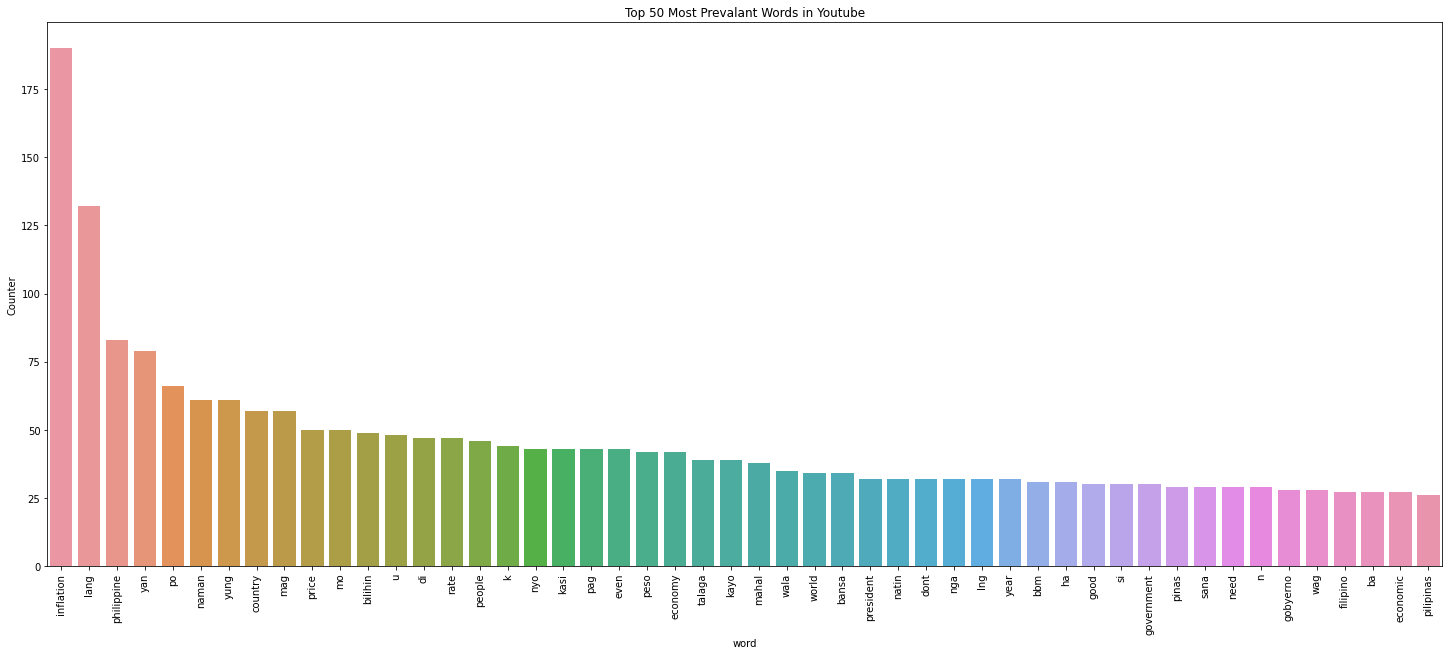

In [ ]:
# Top 50 most prevalent words in Youtube
draw_bar_graph_for_text_visualization(df_yt, 'Youtube')

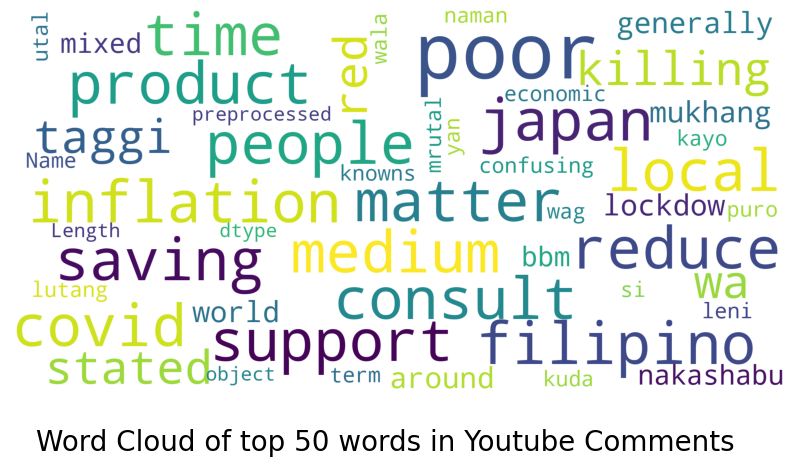

In [37]:
# WordCloud for Youtube comments
draw_word_cloud(df_yt, 'Word Cloud of top 50 words in Youtube Comments')

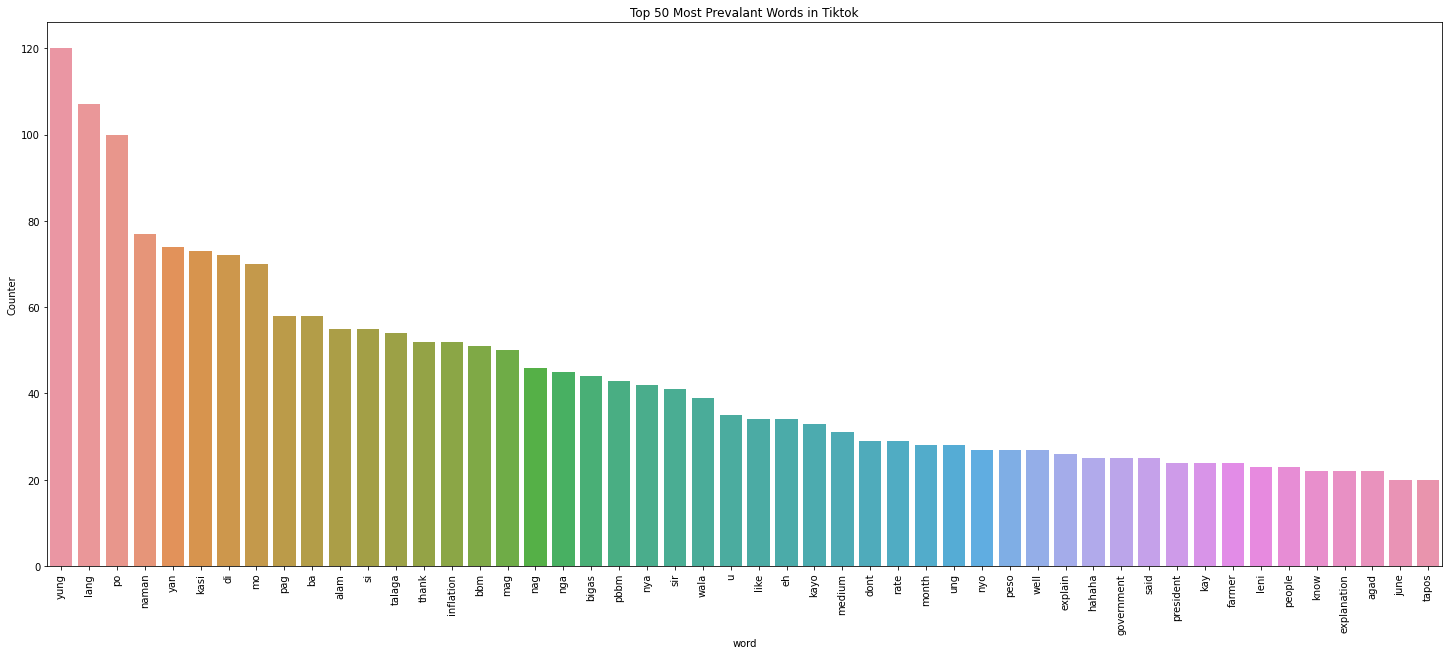

In [ ]:
# Top 50 most prevalent words in Tiktok
draw_bar_graph_for_text_visualization(df_tik, 'Tiktok')

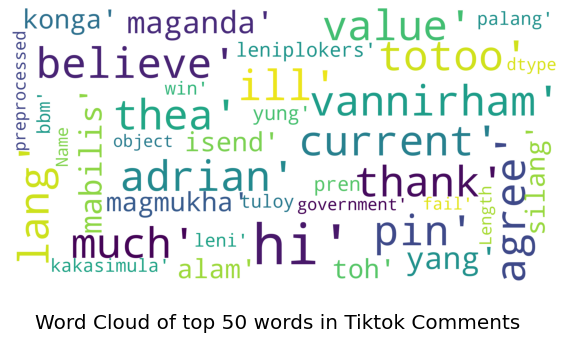

In [ ]:
# WordCloud for Tiktok comments
draw_word_cloud(df_tik, 'Word Cloud of top 50 words in Tiktok Comments')

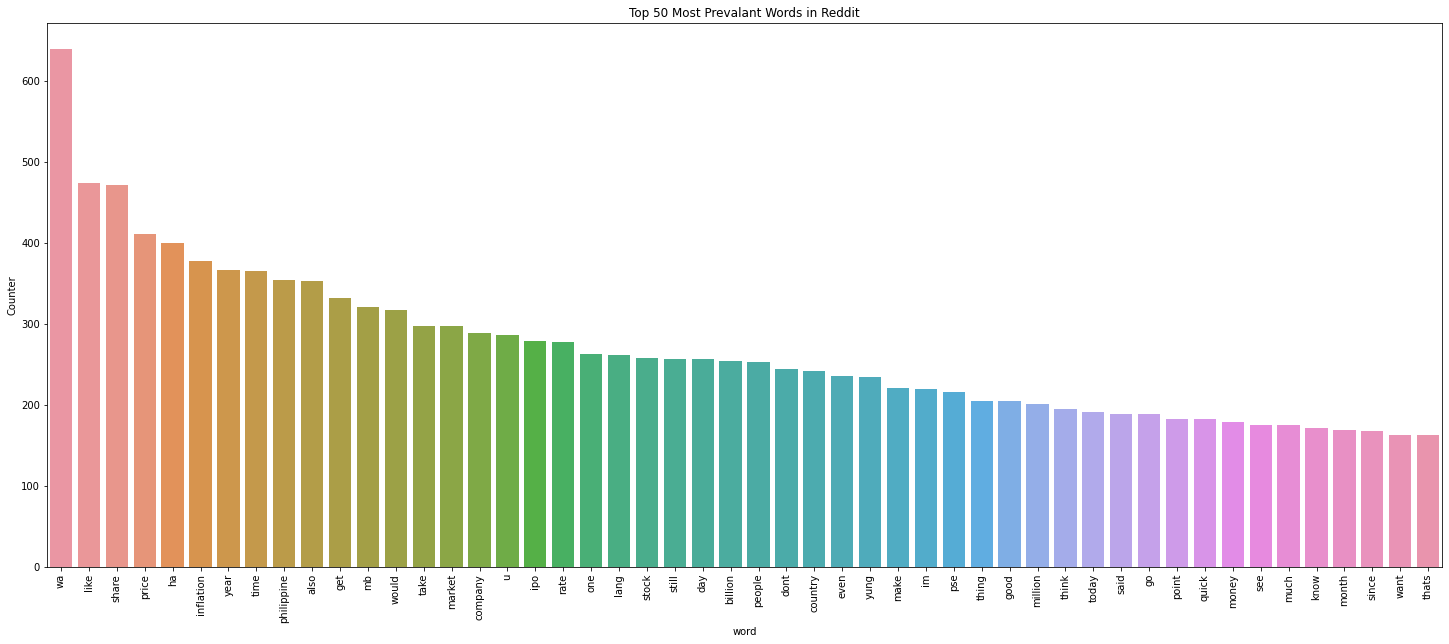

In [ ]:
# Top 50 most prevalent words in Reddit
draw_bar_graph_for_text_visualization(df_red, 'Reddit')

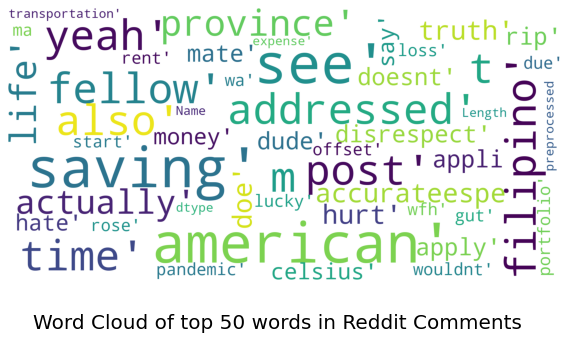

In [ ]:
# WordCloud for Reddit comments
draw_word_cloud(df_red, 'Word Cloud of top 50 words in Reddit Comments')